# Módulo 3: Ejercicio de evaluación final

***Los Datos:***
 Los datos que se proporciona consisten en dos conjuntos de archivos que, en conjunto, describen el
 comportamiento de los clientes dentro de un programa de lealtad de una aerolínea.

***Customer Flight Analysis.csv***

 Este archivo contiene información sobre la actividad de vuelo de los clientes, incluyendo el número de vuelos reservados, la distancia volada, puntos acumulados y redimidos, y costos asociados a los puntos redimidos:

 - Loyalty Number: Este atributo representa un identificador único para cada cliente dentro del programa de lealtad de la aerolínea. Cada número de lealtad corresponde a un cliente específico.

 - Year: Indica el año en el cual se registraron las actividades de vuelo para el cliente. 
 
 - Month: Representa el mes del año (de 1 a 12) en el cual ocurrieron las actividades de vuelo.
 
 - Flights Booked: Número total de vuelos reservados por el cliente en ese mes específico.
 
 - Flights with Companions: Número de vuelos reservados en los cuales el cliente viajó con acompañantes.
 
 - Total Flights: El número total de vuelos que el cliente ha realizado, que puede incluir vuelos reservados en meses anteriores.
 
 - Distance: La distancia total (presumiblemente en millas o kilómetros) que el cliente ha volado durante el mes.
 
 - Points Accumulated: Puntos acumulados por el cliente en el programa de lealtad durante el mes, con base en la distancia volada u otros factores.
 
 - Points Redeemed: Puntos que el cliente ha redimido en el mes, posiblemente para obtener beneficios como vuelos gratis, mejoras, etc.
 
 - Dollar Cost Points Redeemed: El valor en dólares de los puntos que el cliente ha redimido durante el mes.

 ***Customer Loyalty History.csv***
 
 Este archivo proporciona un perfil detallado de los clientes, incluyendo su ubicación, nivel educativo, ingresos, estad, civil, y detalles sobre su membresía en el programa de lealtad (como el tipo de tarjeta, valor de vida del cliente, y fechas de inscripción y cancelación).
 
 - Loyalty Number: Identificador único del cliente dentro del programa de lealtad. Este número permite correlacionar la información de este archivo con el archivo de actividad de vuelos.
 
 - Country: País de residencia del cliente.

 - Province: Provincia o estado de residencia del cliente (aplicable a países con divisiones provinciales o estatales, como Canadá).
 
 - City: Ciudad de residencia del cliente.
 
 - Postal Code: Código postal del cliente.
 
 - Gender: Género del cliente (ej. Male para masculino y Female para femenino).
 
 - Education: Nivel educativo alcanzado por el cliente (ej. Bachelor para licenciatura, College para estudios universitarios o técnicos, etc.).
 
 - Salary: Ingreso anual estimado del cliente.
 
 - Marital Status: Estado civil del cliente (ej. Single para soltero, Married para casado, Divorced para divorciado, etc.).
 
 - Loyalty Card: Tipo de tarjeta de lealtad que posee el cliente. Esto podría indicar distintos niveles o categorías dentro del programa de lealtad.
 
 - CLV (Customer Lifetime Value): Valor total estimado que el cliente aporta a la empresa durante toda la relación que mantiene con ella.
 
 - Enrollment Type: Tipo de inscripción del cliente en el programa de lealtad (ej. Standard).
 
 - Enrollment Year: Año en que el cliente se inscribió en el programa de lealtad.
 
 - Enrollment Month: Mes en que el cliente se inscribió en el programa de lealtad.
 
 - Cancellation Year: Año en que el cliente canceló su membresía en el programa de lealtad, si aplica.
 
 - Cancellation Month: Mes en que el cliente canceló su membresía en el programa de lealtad, si aplica.

## Fase 1: Exploración y Limpieza

 `1. Exploración Inicial:`

  - Realiza una exploración inicial de los datos para identificar posibles problemas, como valores nulos, atípicos o datos faltantes en las columnas relevantes.
 
 - Utiliza funciones de Pandas para obtener información sobre la estructura de los datos, la presencia de valores nulos y estadísticas básicas de las columnas involucradas.
 
 - Une los dos conjuntos de datos de la forma más eficiente.

In [1]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
#import scipy.stats as stats
import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [2]:
"""Exploración Customer_Flight_Activity.csv"""

'Exploración Customer_Flight_Activity.csv'

In [3]:
df_Flight_Activity = pd.read_csv("./FILES/Customer_Flight_Activity.csv")
df_Flight_Activity.sample(5)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
318729,871094,2018,7,0,0,0,0,0.0,0,0
358670,300818,2018,10,6,6,12,2028,202.0,0,0
356442,888901,2017,8,0,0,0,0,0.0,0,0
51125,122685,2017,4,5,0,5,1855,185.0,0,0
282744,753814,2018,5,2,0,2,832,83.0,0,0


In [4]:
"""Shape para contar el número de filas y columnas"""

df_Flight_Activity.shape

(405624, 10)

In [5]:
"""Resumen informativo: *Columna, tipo de datos en cada columna y total de columnas. *Filas, número de datos no nulos"""

df_Flight_Activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


In [6]:
"""Resumen estadístico descriptivo de las columnas numéricas del DataFrame df_Flight_Activity, con la particularidad de que la tabla resultante está transpuesta (las filas se convierten en columnas y viceversa)."""

df_Flight_Activity.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.0,326961.00,550834.0,772194.00,999986.0
Year,405624.0,2017.500000,0.500001,2017.0,2017.00,2017.5,2018.00,2018.0
Month,405624.0,6.500000,3.452057,1.0,3.75,6.5,9.25,12.0
Flights Booked,405624.0,4.115052,5.225518,0.0,0.00,1.0,8.00,21.0
Flights with Companions,405624.0,1.031805,2.076869,0.0,0.00,0.0,1.00,11.0
Total Flights,405624.0,5.146858,6.521227,0.0,0.00,1.0,10.00,32.0
Distance,405624.0,1208.880059,1433.155320,0.0,0.00,488.0,2336.00,6293.0
Points Accumulated,405624.0,123.692721,146.599831,0.0,0.00,50.0,239.00,676.5
Points Redeemed,405624.0,30.696872,125.486049,0.0,0.00,0.0,0.00,876.0
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.0,0.00,0.0,0.00,71.0


In [7]:
"""Dada la estadística, se procedió a revisar las filas con más valores '0' y comprobar qué otros valores hay."""

"Dada la estadística, se procedió a revisar las filas con más valores '0' y comprobar qué otros valores hay."

In [8]:
"""Value_counts para cada valor único, la salida indica cuántas veces aparece en la columna"""

df_Flight_Activity["Dollar Cost Points Redeemed"].value_counts()

Dollar Cost Points Redeemed
0     381443
36      1037
38      1001
40       993
42       983
39       943
44       923
41       913
37       887
43       877
35       852
34       844
32       817
33       800
45       779
30       772
46       753
31       722
47       675
48       638
28       598
29       596
50       595
49       568
52       482
51       435
27       421
54       402
26       379
53       377
56       365
55       343
57       274
58       265
60       260
59       219
25       209
61       175
63       175
62       155
64       152
24       110
66       106
65        90
68        85
67        68
70        38
69        28
71         2
Name: count, dtype: int64

In [9]:
"""Value_counts para cada valor único, la salida indica cuántas veces aparece en la columna"""

df_Flight_Activity["Points Redeemed"].value_counts()

Points Redeemed
0      381443
447       103
523       100
443        98
516        97
        ...  
834         1
858         1
862         1
869         1
859         1
Name: count, Length: 587, dtype: int64

In [10]:
"""Value_counts para cada valor único, la salida indica cuántas veces aparece en la columna"""

df_Flight_Activity["Flights with Companions"].value_counts()

Flights with Companions
0     296887
2      19272
3      19015
1      17905
4      13665
5      13424
6       9911
7       7089
8       3965
9       2944
10      1071
11       476
Name: count, dtype: int64

In [11]:
"""Duplicated para indicar qué filas (en un DataFrame) o elementos (en una Serie) son duplicados de filas."""

# Identificar los números duplicados
duplicados = df_Flight_Activity[df_Flight_Activity['Loyalty Number'].duplicated()]

# Extraer solo la columna 'employeenumber' de los duplicados
numeros_duplicados = duplicados['Loyalty Number']

# Imprimir los números duplicados
print(numeros_duplicados)

# si solo quieres los valores unicos de los duplicados.
print(numeros_duplicados.unique())

# si quieres contar los duplicados.
print(numeros_duplicados.value_counts())

37        100504
39        100504
42        101902
88        100504
101       100504
           ...  
405619    999902
405620    999911
405621    999940
405622    999982
405623    999986
Name: Loyalty Number, Length: 388887, dtype: int64
[100504 101902 106001 ... 999731 999788 999891]
Loyalty Number
678205    71
373638    47
947778    47
886803    47
279419    47
          ..
409951    23
409989    23
410202    23
410209    23
999891    23
Name: count, Length: 16737, dtype: int64


In [12]:
"""Utiliza el indexador .loc para acceder a filas basándote en el valor de su índice (etiqueta)."""

df_Flight_Activity.loc[[37, 39, 88, 101]]

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
37,100504,2017,2,0,0,0,0,0.0,0,0
39,100504,2017,3,0,0,0,0,0.0,0,0
88,100504,2017,4,0,0,0,0,0.0,0,0
101,100504,2017,5,0,0,0,0,0.0,0,0


In [13]:
"""Identificar y mostrar todas las filas que tienen 'Loyalty Number' duplicados, ordenadas por el 'Loyalty Number'."""

#subset='Loyalty Number'los duplicados deben basarse únicamente en los valores de la columna 'Loyalty Number'.
#keep=False, todas las ocurrencias de los 'Loyalty Number' duplicados se marcan como True.

df_Flight_Activity[df_Flight_Activity.duplicated(subset='Loyalty Number', keep=False)].sort_values('Loyalty Number')

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
388723,100018,2018,12,17,6,23,4945,494.0,0,0
185911,100018,2017,12,6,0,6,1908,190.0,0,0
101406,100018,2017,7,10,0,10,3870,387.0,0,0
287317,100018,2018,6,0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
304217,999986,2018,6,0,0,0,0,0.0,0,0
321118,999986,2018,7,15,0,15,1995,199.0,0,0
354920,999986,2018,9,0,0,0,0,0.0,0,0
185910,999986,2017,11,0,0,0,0,0.0,0,0


In [14]:
"""Se considerarán duplicadas solo si tienen los mismos valores en las tres columnas especificadas: 'Loyalty Number', 'Year', y 'Month'."""

df_Flight_Activity[df_Flight_Activity.duplicated(subset=['Loyalty Number', "Year", "Month"], keep=False)].sort_values(['Loyalty Number', "Year", "Month"])

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
41,101902,2017,1,0,0,0,0,0.0,0,0
42,101902,2017,1,0,0,0,0,0.0,0,0
16942,101902,2017,2,0,0,0,0,0.0,0,0
16943,101902,2017,2,0,0,0,0,0.0,0,0
33843,101902,2017,3,0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
371685,992168,2018,10,0,0,0,0,0.0,0,0
130846,992168,2018,11,11,5,16,3360,336.0,502,41
336313,992168,2018,11,1,1,2,546,54.0,343,28
405486,992168,2018,12,15,0,15,3120,312.0,0,0


In [15]:
"""Se considerarán duplicadas solo si tienen los mismos valores en las tres columnas especificadas."""

df_Flight_Activity[df_Flight_Activity.duplicated(subset=['Loyalty Number', "Year", "Month", "Flights Booked", "Flights with Companions", "Total Flights", "Distance", "Points Accumulated", "Points Redeemed", "Dollar Cost Points Redeemed"], keep=False)].sort_values(['Loyalty Number', "Year", "Month", "Flights Booked", "Flights with Companions", "Total Flights", "Distance", "Points Accumulated", "Points Redeemed", "Dollar Cost Points Redeemed"])

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
41,101902,2017,1,0,0,0,0,0.0,0,0
42,101902,2017,1,0,0,0,0,0.0,0,0
16942,101902,2017,2,0,0,0,0,0.0,0,0
16943,101902,2017,2,0,0,0,0,0.0,0,0
33843,101902,2017,3,0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
151972,992168,2017,9,0,0,0,0,0.0,0,0
304080,992168,2018,6,0,0,0,0,0.0,0,0
304081,992168,2018,6,0,0,0,0,0.0,0,0
354783,992168,2018,9,0,0,0,0,0.0,0,0


In [16]:
"""Se encontraron filas duplicadas al comparar todas las columnas"""

'Se encontraron filas duplicadas al comparar todas las columnas'

In [17]:
"""Se eliminan duplicados"""

df_Flight_Activity_1 = df_Flight_Activity.drop_duplicates( #.drop_duplicates() se utiliza para identificar y eliminar filas duplicadas.
    subset=['Loyalty Number', "Year", "Month", "Flights Booked", "Flights with Companions", "Total Flights", "Distance", "Points Accumulated", "Points Redeemed", "Dollar Cost Points Redeemed"], #Se consideran únicamente las combinaciones de valores en las columnas listadas.
    keep='first'  #La primera ocurrencia de cada conjunto de filas duplicadas se conservará
)

df_Flight_Activity_1

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
405619,999902,2018,12,0,0,0,0,0.0,0,0
405620,999911,2018,12,0,0,0,0,0.0,0,0
405621,999940,2018,12,3,0,3,1233,123.0,0,0
405622,999982,2018,12,0,0,0,0,0.0,0,0


In [18]:
"""Comprobación de filas eliminadas"""


df_Flight_Activity_1[df_Flight_Activity_1.duplicated(subset=['Loyalty Number', "Year", "Month", "Flights Booked", "Flights with Companions", "Total Flights", "Distance", "Points Accumulated", "Points Redeemed", "Dollar Cost Points Redeemed"], keep=False)].sort_values(['Loyalty Number', "Year", "Month", "Flights Booked", "Flights with Companions", "Total Flights", "Distance", "Points Accumulated", "Points Redeemed", "Dollar Cost Points Redeemed"])

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed


In [19]:
"""Exploración Customer_Loyalty_History.csv"""

'Exploración Customer_Loyalty_History.csv'

In [20]:
df_Loyalty_History = pd.read_csv("./FILES/Customer_Loyalty_History.csv")
df_Loyalty_History.sample(5)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
8517,837932,Canada,Ontario,Toronto,P2T 6G3,Male,Bachelor,61373.0,Married,Nova,9320.09,Standard,2013,5,NaN,NaN
10419,699875,Canada,Quebec,Montreal,H2Y 4R4,Female,Bachelor,51732.0,Married,Star,2424.42,Standard,2015,2,NaN,NaN
10730,172259,Canada,British Columbia,Victoria,V10 6T5,Female,High School or Below,72896.0,Divorced,Star,2491.26,Standard,2016,7,2017.0,12.0
2969,972795,Canada,Alberta,Edmonton,T3G 6Y6,Male,Bachelor,50660.0,Single,Aurora,9624.52,Standard,2016,12,NaN,NaN
4640,641164,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,51277.0,Married,Nova,2965.72,Standard,2013,6,NaN,NaN


In [21]:
"""Shape para contar el número de filas y columnas"""

df_Loyalty_History.shape

(16737, 16)

In [22]:
"""Resumen informativo: *Columna, tipo de datos en cada columna y total de columnas. *Filas, número de datos no nulos"""

df_Loyalty_History.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

In [23]:
"""En el resumen estadistico se vio una diferencia de no nulos, con isnull().sum() se contavilizan estos nulos."""

ver_nulos = df_Loyalty_History.isnull().sum()
ver_nulos

Loyalty Number            0
Country                   0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Salary                 4238
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
Cancellation Year     14670
Cancellation Month    14670
dtype: int64

In [24]:
"""Resumen estadístico descriptivo de las columnas categoricas del DataFrame df_Loyalty_History, con la particularidad de que la tabla resultante está transpuesta (las filas se convierten en columnas y viceversa)."""

df_Loyalty_History.describe(include="O").T

,count,unique,top,freq
Country,16737,1,Canada,16737
Province,16737,11,Ontario,5404
City,16737,29,Toronto,3351
Postal Code,16737,55,V6E 3D9,911
Gender,16737,2,Female,8410
Education,16737,5,Bachelor,10475
Marital Status,16737,3,Married,9735
Loyalty Card,16737,3,Star,7637
Enrollment Type,16737,2,Standard,15766


In [25]:
"""Dada la estadística, se procedió a revisar las filas con más valores '1' y comprobar qué otros valores hay."""

"Dada la estadística, se procedió a revisar las filas con más valores '1' y comprobar qué otros valores hay."

In [26]:
"""Value_counts para cada valor único, la salida indica cuántas veces aparece en la columna"""
"""Se observa que la columna 'Country' solo contiene el valor 'Canada', por lo que se puede determinar que no es relevante para este análisis."""

df_Loyalty_History["Country"].value_counts()

Country
Canada    16737
Name: count, dtype: int64

In [27]:
"""Value_counts para cada valor único, la salida indica cuántas veces aparece en la columna"""

df_Loyalty_History["Enrollment Type"].value_counts()

Enrollment Type
Standard          15766
2018 Promotion      971
Name: count, dtype: int64

In [28]:
"""Value_counts para cada valor único, la salida indica cuántas veces aparece en la columna"""
"""Se encontraron valores negativos"""

df_Loyalty_History["Salary"].value_counts()

Salary
 101933.0    23
 62283.0     14
 61809.0     14
 51573.0     14
 64001.0     13
             ..
 95907.0      1
 72440.0      1
 88633.0      1
 100572.0     1
-57297.0      1
Name: count, Length: 5890, dtype: int64

In [29]:
"""Unique para visualizar todos los valores únicos"""
"""Se comprueban valores negativos y nulos"""
df_Loyalty_History["Salary"].unique()

array([ 83236.,     nan, 103495., ...,  76178.,  91970., -57297.])

In [30]:
"""Value_counts para cada valor único, la salida indica cuántas veces aparece en la columna"""

df_Loyalty_History["Cancellation Year"].value_counts()

Cancellation Year
2018.0    645
2017.0    506
2016.0    427
2015.0    265
2014.0    181
2013.0     43
Name: count, dtype: int64

In [31]:
"""Value_counts para cada valor único, la salida indica cuántas veces aparece en la columna"""

df_Loyalty_History["Cancellation Month"].value_counts()

Cancellation Month
12.0    213
11.0    212
8.0     208
7.0     186
10.0    180
9.0     176
6.0     165
1.0     155
3.0     149
5.0     148
2.0     139
4.0     136
Name: count, dtype: int64

In [32]:
"""Duplicated para indicar qué filas (en un DataFrame) o elementos (en una Serie) son duplicados de filas."""

# Identificar los números duplicados
duplicados = df_Loyalty_History[df_Loyalty_History['Loyalty Number'].duplicated()]
duplicados

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month


In [33]:
"""Al finalizar la exploración para los 2 DataFrame se procede a unir"""

'Al finalizar la exploración para los 2 DataFrame se procede a unir'

In [34]:
"""Merge para realizar una operación de combinación entre dos DataFrames"""

df_customer=df_Flight_Activity_1.merge(df_Loyalty_History, on=['Loyalty Number'], how="left") 

df_customer.sample(3)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
114790,844145,2017,7,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1J 8T7,Female,College,NaN,Single,Nova,74228.52,Standard,2015,9,2016.0,4.0
277949,575844,2018,5,0,0,0,0,0.0,0,0,Canada,British Columbia,West Vancouver,V6V 8Z3,Female,Bachelor,101933.0,Married,Aurora,8564.77,Standard,2016,1,NaN,NaN
8429,553061,2017,1,1,0,1,1828,182.0,0,0,Canada,Ontario,London,M5B 3E4,Male,Bachelor,90023.0,Married,Star,12625.28,Standard,2016,9,NaN,NaN


In [35]:
"""Shape para contar el número de filas y columnas"""

df_customer.shape

(403760, 25)

 `2. Limpieza de Datos:`

 - Elimina o trata los valores nulos, si los hay, en las columnas clave para asegurar que los datos estén completos.
 
 - Verifica la consistencia y corrección de los datos para asegurarte de que los datos se presenten de forma coherente.
 
 - Realiza cualquier ajuste o conversión necesaria en las columnas (por ejemplo cambiar tipos de datos) para garantizar la adecuación de los datos para el análisis estadístico.

In [36]:
"""Resumen informativo: *Columna, tipo de datos en cada columna y total de columnas. *Filas, número de datos no nulos"""

df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403760 entries, 0 to 403759
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               403760 non-null  int64  
 1   Year                         403760 non-null  int64  
 2   Month                        403760 non-null  int64  
 3   Flights Booked               403760 non-null  int64  
 4   Flights with Companions      403760 non-null  int64  
 5   Total Flights                403760 non-null  int64  
 6   Distance                     403760 non-null  int64  
 7   Points Accumulated           403760 non-null  float64
 8   Points Redeemed              403760 non-null  int64  
 9   Dollar Cost Points Redeemed  403760 non-null  int64  
 10  Country                      403760 non-null  object 
 11  Province                     403760 non-null  object 
 12  City                         403760 non-null  object 
 13 

In [37]:
"""Función para renombrar las columnas"""

df_customer.rename(columns={columna: columna.replace(' ', '_').lower() for columna in df_customer.columns}, inplace=True)

In [38]:
df_customer.sample(2)

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
398451,715645,2018,12,3,3,6,894,89.0,0,0,Canada,Newfoundland,St. John's,A1C 6H9,Female,College,NaN,Divorced,Nova,4882.07,Standard,2014,10,NaN,NaN
201173,968064,2017,12,0,0,0,0,0.0,0,0,Canada,Quebec,Montreal,H4G 3T4,Female,High School or Below,64607.0,Married,Nova,24660.49,Standard,2017,12,NaN,NaN


In [39]:
"""Función para renombrar las columnas"""

lista_col = ['year', 'month']

# Renombrar las columnas usando un diccionario
df_customer.rename(columns={col: 'flight_' + col for col in lista_col}, inplace=True)

In [40]:
df_customer.sample(2)

,loyalty_number,flight_year,flight_month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
235934,433172,2018,4,7,0,7,1323,165.0,0,0,Canada,Alberta,Peace River,T9O 2W2,Female,College,NaN,Married,Nova,2738.00,Standard,2013,6,NaN,NaN
183736,936570,2017,11,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,M2M 7K8,Female,Bachelor,60366.0,Single,Nova,8105.91,Standard,2014,11,NaN,NaN


In [41]:
"""Función para eliminar columna no útil para el analisis por tener un único valor"""

df_customer.drop(["country"], axis=1, inplace=True)

In [42]:
df_customer.head(4)

,loyalty_number,flight_year,flight_month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100102,2017,1,10,4,14,2030,203.0,0,0,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
2,100140,2017,1,6,0,6,1200,120.0,0,0,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN
3,100214,2017,1,0,0,0,0,0.0,0,0,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN


In [43]:
"""Función para convertir números a nombres de meses"""

def numero_a_mes(numero):
    if pd.isna(numero):
        return np.nan
    else:
        meses = {
            1: 'enero',
            2: 'febrero',
            3: 'marzo',
            4: 'abril',
            5: 'mayo',
            6: 'junio',
            7: 'julio',
            8: 'agosto',
            9: 'septiembre',
            10: 'octubre',
            11: 'noviembre',
            12: 'diciembre'
        }
        return meses.get(numero, np.nan)

#Aplicar la función a las columnas usando applymap
df_customer[["flight_month", "enrollment_month", "cancellation_month"]] = df_customer[["flight_month", "enrollment_month", "cancellation_month"]].applymap(numero_a_mes)

df_customer[["flight_month", "enrollment_month", "cancellation_month"]]


C:\Users\InvitadoLaptop\AppData\Local\Temp\ipykernel_16060\2712814767.py:24: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_customer[["flight_month", "enrollment_month", "cancellation_month"]] = df_customer[["flight_month", "enrollment_month", "cancellation_month"]].applymap(numero_a_mes)


,flight_month,enrollment_month,cancellation_month
0,enero,agosto,NaN
1,enero,marzo,NaN
2,enero,julio,NaN
3,enero,agosto,NaN
4,enero,enero,NaN
...,...,...,...
403755,diciembre,mayo,NaN
403756,diciembre,agosto,NaN
403757,diciembre,julio,NaN
403758,diciembre,julio,NaN


In [44]:
"""Aplicar la función lambda a todas las columnas numéricas negativas"""

for columna in df_customer.select_dtypes(include='number').columns:
    df_customer[columna] = df_customer[columna].apply(lambda x: -x if x < 0 else x)

df_customer.sample(2)

,loyalty_number,flight_year,flight_month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
380716,668865,2018,noviembre,0,0,0,0,0.0,0,0,British Columbia,Vancouver,V6E 3Z3,Female,College,NaN,Married,Star,23866.16,Standard,2016,diciembre,NaN,NaN
20196,283110,2017,febrero,9,0,9,1944,194.0,0,0,British Columbia,Vancouver,V6E 3D9,Male,Bachelor,99089.0,Married,Star,2867.21,Standard,2014,noviembre,NaN,NaN


In [45]:
"""Verificar si tenemos negativos en esta columna"""

df_customer["salary"].unique()

array([92552.,    nan, 63253., ..., 23160., 97206., 56345.])

In [46]:
"""Revisar los nulos"""

colum_nulos = df_customer.isnull().sum() 

df_nulos = pd.DataFrame(colum_nulos, columns = ["cantidad_nulos"])

df_nulos[df_nulos["cantidad_nulos"] > 0]

,cantidad_nulos
salary,102260
cancellation_year,354110
cancellation_month,354110


In [47]:
"""Revisar toda la data de los nulos de la columna 'salary'."""

df_customer[df_customer['salary'].isnull()].sample(5)

,loyalty_number,flight_year,flight_month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
357570,332716,2018,octubre,0,0,0,0,0.0,0,0,British Columbia,Dawson Creek,U5I 4F1,Male,College,NaN,Single,Nova,7250.03,Standard,2017,mayo,NaN,NaN
39443,415327,2017,marzo,0,0,0,0,0.0,0,0,Quebec,Montreal,H2T 9K8,Female,College,NaN,Married,Star,4739.30,Standard,2017,septiembre,NaN,NaN
204443,244538,2018,enero,12,0,12,960,96.0,0,0,Newfoundland,St. John's,A1C 6H9,Male,College,NaN,Single,Nova,6240.66,Standard,2016,julio,NaN,NaN
371150,157879,2018,noviembre,5,1,6,2988,298.0,0,0,Ontario,Toronto,P5S 6R4,Male,College,NaN,Single,Nova,3923.27,Standard,2015,agosto,NaN,NaN
337604,166537,2018,septiembre,3,0,3,1239,123.0,0,0,British Columbia,Vancouver,V6E 3Z3,Female,College,NaN,Single,Aurora,8708.02,Standard,2015,marzo,NaN,NaN


In [48]:
"""Encontrar relación 'salary' y 'education'."""

df_customer[['salary', 'education']]

,salary,education
0,92552.0,Bachelor
1,NaN,College
2,NaN,College
3,63253.0,Bachelor
4,91163.0,Bachelor
...,...,...
403755,NaN,College
403756,217943.0,Doctor
403757,47670.0,Bachelor
403758,NaN,College


In [49]:
# 1. Filtrar filas donde SALARY es NaN y EDUCATION es 'College'
filas_nan_salary_college = df_customer[(df_customer['salary'].isnull()) & (df_customer['education'] == 'College')]

# 2. Contar el número de filas
cantidad_filas = len(filas_nan_salary_college)
print(f"Número de filas donde SALARY es NaN y EDUCATION es 'College': {cantidad_filas}")

# 3. Contar el número total de NaN en SALARY
cantidad_nan_salary = df_customer['salary'].isnull().sum()
print(f"Número total de NaN en SALARY: {cantidad_nan_salary}")

# 4. Calcular el porcentaje de NaN en SALARY relacionados con 'College'
porcentaje_nan_college = (cantidad_filas / cantidad_nan_salary) * 100 if cantidad_nan_salary > 0 else 0
print(f"Porcentaje de NaN en SALARY relacionados con 'College': {porcentaje_nan_college:.2f}%")

Número de filas donde SALARY es NaN y EDUCATION es 'College': 102260
Número total de NaN en SALARY: 102260
Porcentaje de NaN en SALARY relacionados con 'College': 100.00%


In [50]:
"""No se aplica ningún tratamiento a los NaN de 'salary' por estar directamente relacionados"""

"No se aplica ningún tratamiento a los NaN de 'salary' por estar directamente relacionados"

In [51]:
"""Buscar relación entre las columnas"""

df_customer[["loyalty_number", "flight_year", "flight_month", "enrollment_year", "enrollment_month", "cancellation_year", "cancellation_month"]].sample(10)

,loyalty_number,flight_year,flight_month,enrollment_year,enrollment_month,cancellation_year,cancellation_month
309396,458864,2018,julio,2018,junio,NaN,NaN
197123,749328,2017,diciembre,2016,junio,NaN,NaN
31459,883773,2017,febrero,2012,junio,NaN,NaN
84866,145193,2017,junio,2018,septiembre,NaN,NaN
120294,242637,2017,agosto,2013,enero,2014.0,septiembre
5904,419776,2017,enero,2014,mayo,NaN,NaN
105208,334574,2017,julio,2012,septiembre,NaN,NaN
94036,634807,2017,junio,2012,agosto,NaN,NaN
1259,168026,2017,enero,2012,septiembre,NaN,NaN
280400,706106,2018,mayo,2016,junio,NaN,NaN


In [52]:
"""Buscar relación entre las columnas"""

df_customer[df_customer["cancellation_month"].notnull()].sample(10)

,loyalty_number,flight_year,flight_month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
317148,809728,2018,julio,4,0,4,640,64.0,0,0,Ontario,Toronto,P1J 8T7,Female,Doctor,168331.0,Married,Aurora,4987.64,Standard,2018,enero,2018.0,septiembre
69905,246399,2017,mayo,0,0,0,0,0.0,0,0,Nova Scotia,Halifax,B3J 9S2,Female,Bachelor,70384.0,Single,Star,8879.79,Standard,2015,julio,2016.0,febrero
351262,878510,2018,octubre,0,0,0,0,0.0,0,0,Saskatchewan,Regina,S6J 3G0,Male,Bachelor,93281.0,Single,Nova,2971.92,Standard,2017,mayo,2018.0,enero
376241,430519,2018,noviembre,0,0,0,0,0.0,0,0,Quebec,Quebec City,G1B 3L5,Female,Bachelor,57499.0,Married,Star,5671.93,Standard,2016,febrero,2016.0,diciembre
393449,979634,2018,enero,0,0,0,0,0.0,0,0,Manitoba,Winnipeg,R2C 0M5,Female,College,NaN,Married,Nova,3187.35,Standard,2015,agosto,2018.0,septiembre
108852,529331,2017,julio,0,0,0,0,0.0,0,0,Ontario,Toronto,M8Y 4K8,Male,Bachelor,78033.0,Married,Aurora,49221.43,Standard,2013,mayo,2015.0,diciembre
302482,770759,2017,septiembre,0,0,0,0,0.0,0,0,British Columbia,Vancouver,V1E 4R6,Male,College,NaN,Married,Nova,22041.86,Standard,2014,abril,2017.0,junio
67443,252082,2018,mayo,0,0,0,0,0.0,0,0,Newfoundland,St. John's,A1C 6H9,Male,Bachelor,76064.0,Single,Star,7229.33,Standard,2014,mayo,2018.0,septiembre
338449,210485,2018,septiembre,0,0,0,0,0.0,0,0,British Columbia,Vancouver,V1E 4R6,Female,Bachelor,88516.0,Married,Nova,2796.80,Standard,2015,julio,2016.0,febrero
10362,654919,2017,enero,0,0,0,0,0.0,0,0,British Columbia,Vancouver,V6E 3D9,Female,High School or Below,80893.0,Married,Aurora,9162.06,Standard,2013,abril,2014.0,agosto


In [53]:

# 1. Filtrar filas donde CANCELLATION_YEAR y CANCELLATION_MONTH son NaN
filas_nan = df_customer[(df_customer['cancellation_year'].isnull()) & (df_customer['cancellation_month'].isnull())]

# 2. Contar el número de filas
cantidad_filas = len(filas_nan)
print(f"Número de filas donde CANCELLATION_YEAR y CANCELLATION_MONTH son NaN: {cantidad_filas}")

# 3. Contar el número total de NaN en CANCELLATION_YEAR
cantidad_nan_year = df_customer['cancellation_year'].isnull().sum()
print(f"Número total de NaN en CANCELLATION_YEAR: {cantidad_nan_year}")

# 4. Calcular el porcentaje de NaN en CANCELLATION_YEAR relacionados con NaN en CANCELLATION_MONTH
porcentaje_nan = (cantidad_filas / cantidad_nan_year) * 100 if cantidad_nan_year > 0 else 0
print(f"Porcentaje de NaN en CANCELLATION_YEAR relacionados con NaN en CANCELLATION_MONTH: {porcentaje_nan:.2f}%")

Número de filas donde CANCELLATION_YEAR y CANCELLATION_MONTH son NaN: 354110
Número total de NaN en CANCELLATION_YEAR: 354110
Porcentaje de NaN en CANCELLATION_YEAR relacionados con NaN en CANCELLATION_MONTH: 100.00%


In [54]:
"No se aplica ningún tratamiento a los valores NaN de 'cancellation_year' y 'cancellation_month' por estar directamente relacionados."

"Se presume que los clientes con valores NaN en 'cancellation_year' y 'cancellation_month' están activos, ya que incluso aquellos que cancelaron su suscripción tienen datos ('0') en las columnas de puntuación."

"Se presume que los clientes con valores NaN en 'cancellation_year' y 'cancellation_month' están activos, ya que incluso aquellos que cancelaron su suscripción tienen datos ('0') en las columnas de puntuación."

In [55]:
"""Resumen estadístico descriptivo de las columnas numéricas del DataFrame df_customer, con la particularidad de que la tabla resultante está transpuesta (las filas se convierten en columnas y viceversa)."""

df_customer.describe().T

,count,mean,std,min,25%,50%,75%,max
loyalty_number,403760.0,549875.383713,258961.514684,100018.00,326699.00,550598.00,772152.00,999986.00
flight_year,403760.0,2017.500352,0.500000,2017.00,2017.00,2018.00,2018.00,2018.00
flights_booked,403760.0,4.134050,5.230064,0.00,0.00,1.00,8.00,21.00
flights_with_companions,403760.0,1.036569,2.080472,0.00,0.00,0.00,1.00,11.00
total_flights,403760.0,5.170619,6.526858,0.00,0.00,1.00,10.00,32.00
distance,403760.0,1214.460979,1434.098521,0.00,0.00,525.00,2342.00,6293.00
points_accumulated,403760.0,124.263761,146.696179,0.00,0.00,53.00,240.00,676.50
points_redeemed,403760.0,30.838587,125.758002,0.00,0.00,0.00,0.00,876.00
dollar_cost_points_redeemed,403760.0,2.495973,10.172033,0.00,0.00,0.00,0.00,71.00
salary,301500.0,79371.732902,34726.433958,9081.00,59262.00,73479.00,88606.00,407228.00


In [56]:
"""Resumen estadístico descriptivo de las columnas categoricas del DataFrame df_customer, con la particularidad de que la tabla resultante está transpuesta (las filas se convierten en columnas y viceversa)."""

df_customer.describe(include="O").T

,count,unique,top,freq
flight_month,403760,12,noviembre,33663
province,403760,11,Ontario,130258
city,403760,29,Toronto,80775
postal_code,403760,55,V6E 3D9,21944
gender,403760,2,Female,202757
education,403760,5,Bachelor,252567
marital_status,403760,3,Married,234845
loyalty_card,403760,3,Star,183745
enrollment_type,403760,2,Standard,380419
enrollment_month,403760,12,mayo,36314


In [57]:
df_customer.head(10)

,loyalty_number,flight_year,flight_month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
0,100018,2017,enero,3,0,3,1521,152.0,0,0,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,agosto,NaN,NaN
1,100102,2017,enero,10,4,14,2030,203.0,0,0,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,marzo,NaN,NaN
2,100140,2017,enero,6,0,6,1200,120.0,0,0,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016,julio,NaN,NaN
3,100214,2017,enero,0,0,0,0,0.0,0,0,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,agosto,NaN,NaN
4,100272,2017,enero,0,0,0,0,0.0,0,0,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,enero,NaN,NaN
5,100301,2017,enero,0,0,0,0,0.0,0,0,Ontario,Toronto,P1J 8T7,Male,Bachelor,70323.0,Divorced,Nova,48356.96,Standard,2013,septiembre,NaN,NaN
6,100364,2017,enero,0,0,0,0,0.0,0,0,Saskatchewan,Regina,S6J 3G0,Male,Bachelor,76849.0,Married,Nova,5143.88,Standard,2015,mayo,NaN,NaN
7,100380,2017,enero,0,0,0,0,0.0,0,0,Quebec,Montreal,H2T 9K8,Female,Bachelor,69695.0,Single,Star,2465.62,Standard,2012,octubre,NaN,NaN
8,100428,2017,enero,6,0,6,606,60.0,0,0,British Columbia,Vancouver,V6E 3D9,Male,Bachelor,63478.0,Married,Aurora,5845.43,Standard,2012,agosto,NaN,NaN
9,100504,2017,enero,0,0,0,0,0.0,0,0,Ontario,Sudbury,M5V 1G5,Female,Bachelor,75638.0,Divorced,Nova,8807.61,Standard,2017,julio,2018.0,marzo


In [60]:
"""Guardar df en excel."""

#df_customer.to_excel("df_customer_limpieza.xlsx")

'Guardar df en excel.'

In [62]:
"""Guardar df en csv."""

#df_customer.to_csv("df_customer_limpieza.csv")

'Guardar df en csv.'

## Fase 2: Visualización

Usando las herramientas de visualización que has aprendido durante este módulo, contesta a las siguientes gráficas usando la mejor gráfica que consideres:

1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

In [63]:
df_customer.columns

Index(['loyalty_number', 'flight_year', 'flight_month', 'flights_booked',
       'flights_with_companions', 'total_flights', 'distance',
       'points_accumulated', 'points_redeemed', 'dollar_cost_points_redeemed',
       'province', 'city', 'postal_code', 'gender', 'education', 'salary',
       'marital_status', 'loyalty_card', 'clv', 'enrollment_type',
       'enrollment_year', 'enrollment_month', 'cancellation_year',
       'cancellation_month'],
      dtype='object')

In [64]:
vuelos_mes_año = df_customer.groupby(['flight_year', 'flight_month'])['flights_booked'].sum().reset_index()
vuelos_mes_año

,flight_year,flight_month,flights_booked
0,2017,abril,55720
1,2017,agosto,78692
2,2017,diciembre,77650
3,2017,enero,47766
4,2017,febrero,47691
5,2017,julio,89288
6,2017,junio,80493
7,2017,marzo,64271
8,2017,mayo,65279
9,2017,noviembre,56905


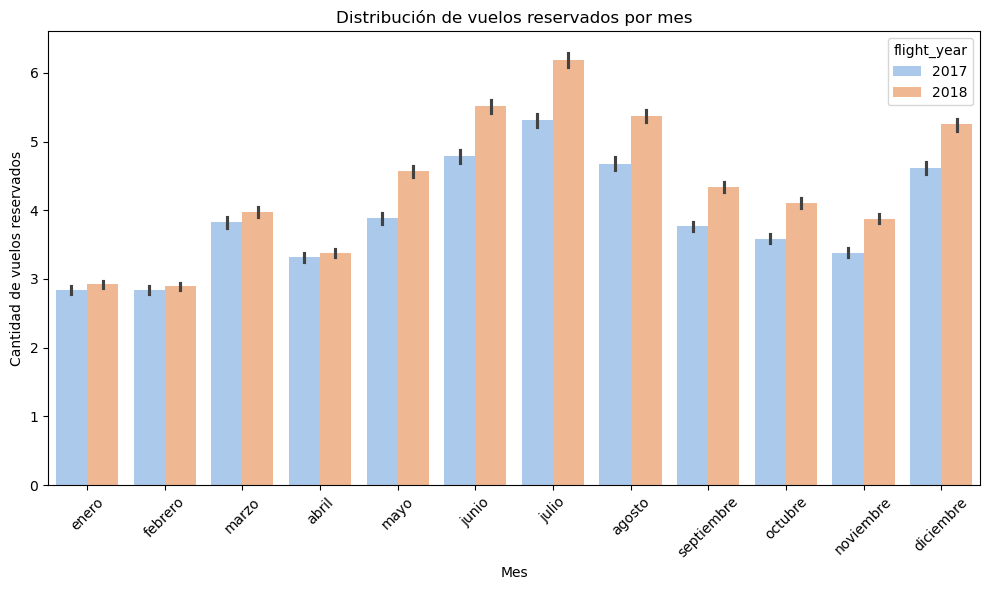

In [65]:
# 1. Definir el orden de los meses
orden_meses = ['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio',
                'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre']

# 2. Convertir la columna 'flight_month' a tipo Categorical con el orden definido
df_customer['flight_month'] = pd.Categorical(df_customer['flight_month'], categories=orden_meses, ordered=True)

# 3. Crear el gráfico de barras
plt.figure(figsize=(10, 6)) #Tamaño de la gráfica
sns.barplot(x="flight_month",
            y="flights_booked",
            hue="flight_year",
            data=df_customer,
            palette="pastel")

# 4. Personalizar el gráfico
plt.title('Distribución de vuelos reservados por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de vuelos reservados')
plt.xticks(rotation=45)

# 5. Mostrar el gráfico
plt.tight_layout()
plt.show()

2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?

In [66]:
df_customer[['loyalty_number', 'flight_year', 'flight_month', 'distance',
       'points_accumulated']]

,loyalty_number,flight_year,flight_month,distance,points_accumulated
0,100018,2017,enero,1521,152.0
1,100102,2017,enero,2030,203.0
2,100140,2017,enero,1200,120.0
3,100214,2017,enero,0,0.0
4,100272,2017,enero,0,0.0
...,...,...,...,...,...
403755,999902,2018,diciembre,0,0.0
403756,999911,2018,diciembre,0,0.0
403757,999940,2018,diciembre,1233,123.0
403758,999982,2018,diciembre,0,0.0


In [ ]:
# 1. Crear una figura con dos subplots dispuestos verticalmente
plt.figure(figsize=(10, 6))

# 2. Crear el gráfico
sns.regplot(x='distance', 
            y='points_accumulated', 
            data=df_customer, 
            line_kws = {"color": "black", "linewidth": 1}, # cambiamos el color y el grosor de la linea de tendencia
            scatter_kws = {"color": "orange", "s": 1} # cambiamos el color y el tamaño de los puntos del scaterplot
            )

# 2. Cambiamos los nombres de los ejes 
plt.xlabel('Distancia del Vuelo')
plt.ylabel('Puntos Acumulados')

# 3. Ponemos título a la gráfica
plt.title('Relación entre Distancia y Puntos Acumulados')

# 4. Quitamos la linea de arriba y de la derecha
plt.gca().spines['right'].set_visible(False) # quitamos la línea de la derecha
plt.gca().spines["top"].set_visible(False) # quitamos la línea de arriba;

3. ¿Cuál es la distribución de los clientes por provincia o estado?

In [ ]:
distribucion = df_customer.groupby(['province', 'city'])['loyalty_number'].count().reset_index()
distribucion

,province,city,loyalty_number
0,Alberta,Banff,4296
1,Alberta,Calgary,4584
2,Alberta,Edmonton,11768
3,Alberta,Peace River,2712
4,British Columbia,Dawson Creek,10725
5,British Columbia,Kelowna,2134
6,British Columbia,Vancouver,62314
7,British Columbia,Victoria,9444
8,British Columbia,West Vancouver,7831
9,British Columbia,Whistler,13994


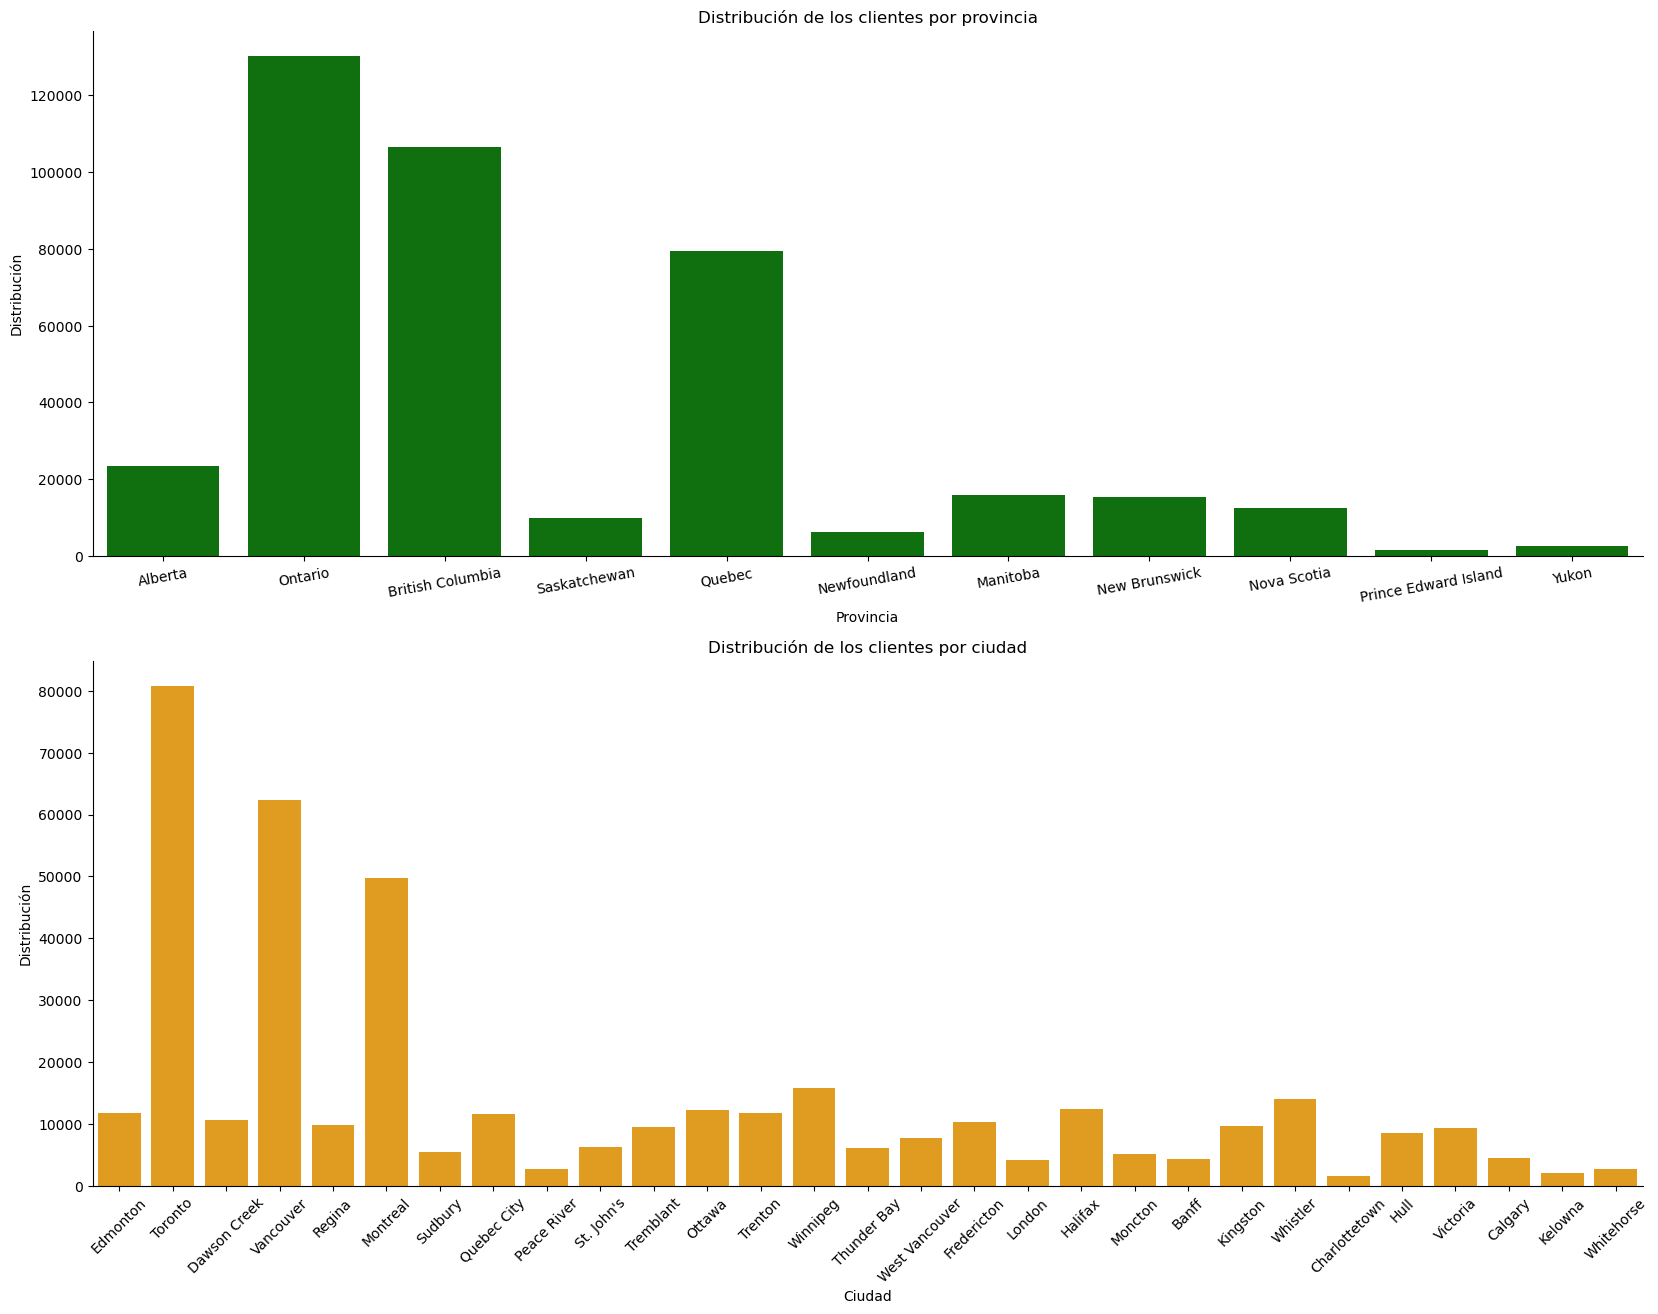

In [ ]:

# 1. Crear una figura con dos subplots dispuestos verticalmente
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 15))

# 2. Primer subplot,  gráfico de barras
sns.countplot(x='province',
            data=df_customer,
            color="green",
            ax=axes[0])

axes[0].set_xlabel("Provincia")
axes[0].set_ylabel("Distribución")
axes[0].tick_params(axis='x', rotation=10)  # Rota las etiquetas del eje x
axes[0].set_title("Distribución de los clientes por provincia")
axes[0].spines['right'].set_visible(False)
axes[0].spines['top'].set_visible(False)

# 3. Segundo subplot,  gráfico de barras
sns.countplot(x='city',
            data=df_customer,
            color="orange",
            ax=axes[1])

axes[1].set_xlabel("Ciudad")
axes[1].set_ylabel("Distribución")
axes[1].tick_params(axis='x', rotation=45)  # Rota las etiquetas del eje x
axes[1].set_title("Distribución de los clientes por ciudad")
axes[1].spines['right'].set_visible(False)
axes[1].spines['top'].set_visible(False)

4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

In [ ]:
salario_promedio = df_customer.groupby(['education'])['salary'].mean().reset_index()
salario_promedio

,education,salary
0,Bachelor,72599.080913
1,College,NaN
2,Doctor,178403.675202
3,High School or Below,61146.378165
4,Master,103734.523724


In [ ]:
clv_promedio = df_customer.groupby(['education'])['clv'].mean().reset_index()
clv_promedio

,education,clv
0,Bachelor,8211.231866
1,College,7584.627706
2,Doctor,7815.738556
3,High School or Below,7731.270379
4,Master,7494.386544


C:\Users\InvitadoLaptop\AppData\Local\Temp\ipykernel_9408\3917676760.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="education",
C:\Users\InvitadoLaptop\AppData\Local\Temp\ipykernel_9408\3917676760.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="education",


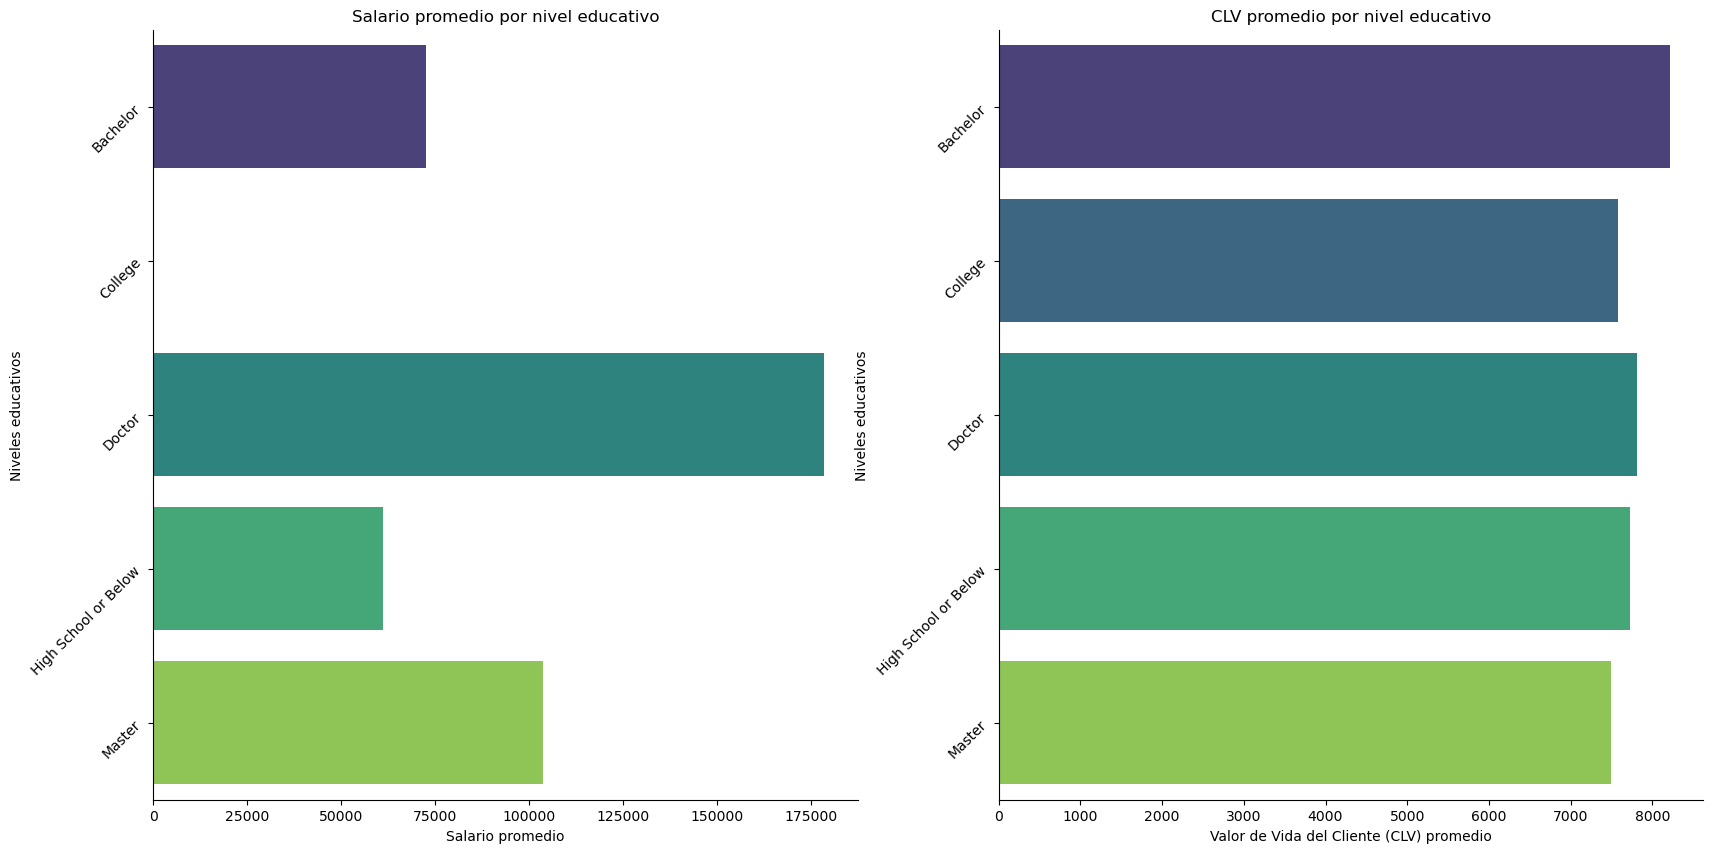

In [ ]:
# 1. Se agrupan columnas segun promedio
salario_promedio = df_customer.groupby(['education'])['salary'].mean().reset_index()
clv_promedio = df_customer.groupby(['education'])['clv'].mean().reset_index()

# 2. Crear una figura con dos subplots dispuestos verticalmente
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# 3. Primer barplot: Salario promedio por nivel educativo
sns.barplot(y="education",
            x="salary",
            data=salario_promedio,
            palette="viridis",
            ax=axes[0])

axes[0].set_xlabel("Salario promedio")
axes[0].set_ylabel("Niveles educativos")
axes[0].set_title("Salario promedio por nivel educativo")
axes[0].tick_params(axis='y', rotation=45) # Rota las etiquetas del eje x
axes[0].spines['right'].set_visible(False)
axes[0].spines['top'].set_visible(False)


# 3. Segundo barplot: Esperanza de vida y tasa de natalidad

sns.barplot(y="education",
            x="clv",
            data=clv_promedio,
            palette="viridis",
            ax=axes[1])
axes[1].set_xlabel("Valor de Vida del Cliente (CLV) promedio")
axes[1].set_ylabel("Niveles educativos")
axes[1].set_title("CLV promedio por nivel educativo")
axes[1].tick_params(axis='y', rotation=45) # Rota las etiquetas del eje x
axes[1].spines['right'].set_visible(False)
axes[1].spines['top'].set_visible(False)

5.  ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

In [ ]:
df_customer['loyalty_card'].value_counts().reset_index()

,loyalty_card,count
0,Star,183745
1,Nova,136883
2,Aurora,83132


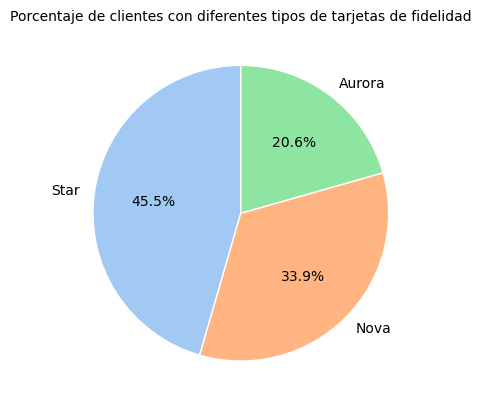

In [ ]:
# 1. Calcula la frecuencia de cada tipo de tarjeta de fidelidad.
tarj_counts = df_customer['loyalty_card'].value_counts()

# 2. Paleta de colores de seaborn
colores = sns.color_palette("pastel")

# 3. Crear el gráfico
plt.pie(tarj_counts,
        labels=tarj_counts.index,
        autopct='%1.1f%%',
        colors=colores,
        textprops={'fontsize': 10},
        startangle=90,
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'})

# 4. Ponemos título a la gráfica
plt.title("Porcentaje de clientes con diferentes tipos de tarjetas de fidelidad", fontsize=10) # Ajustar el tamaño del título
plt.show()

6. ¿Cómo se distribuyen los clientes según su estado civil y género?

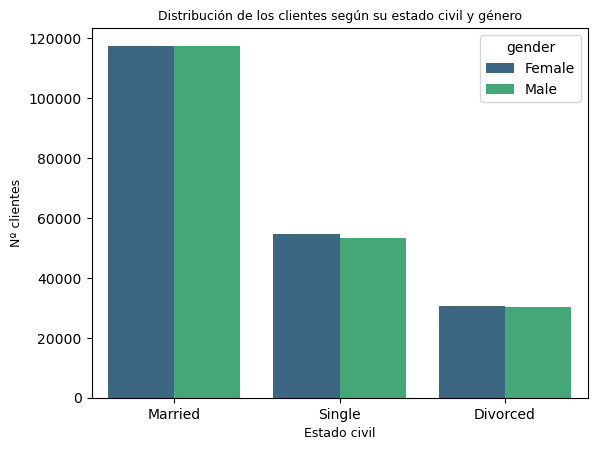

In [ ]:

# 1. Gráfico de barras
sns.countplot(x = "marital_status", 
              data = df_customer, 
              palette = "viridis", 
              hue = "gender")

# 2. Ponemos título a la gráfica
plt.title("Distribución de los clientes según su estado civil y género", fontsize=9) # mejora en el titulo

# 3. Cambiamos los nombres de los ejes 
plt.xlabel("Estado civil", fontsize = 9)
plt.ylabel("Nº clientes",  fontsize = 9); 

## BONUS Fase 3: Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo


Utilizando un conjunto de datos que hemos compartido, se busca evaluar si existen diferencias significativas en el número de vuelos reservados según el nivel educativo de los clientes. Para ello, los pasos que deberás seguir son:

1. Preparación de Datos: Filtra el conjunto de datos para incluir únicamente las columnas relevantes: 'Flights Booked' y 'Education'.

In [ ]:
reserva_count = df_customer.groupby(['education'])['flights_booked'].sum().reset_index()

reserva_count

,education,flights_booked
0,Bachelor,1038123
1,College,426398
2,Doctor,74036
3,High School or Below,78993
4,Master,51614


2. Análisis Descriptivo: Agrupa los datos por nivel educativo y calcula estadísticas descriptivas básicas (como el promedio, la desviación estándar) del número de vuelos reservados para cada grupo.

In [ ]:
reserva_sta = df_customer.groupby(['education'])['flights_booked'].agg(["mean", "median", "std", "var", "min", "max"]).reset_index()

reserva_sta

,education,mean,median,std,var,min,max
0,Bachelor,4.110288,1.0,5.221671,27.265843,0,21
1,College,4.169744,1.0,5.246040,27.520938,0,21
2,Doctor,4.175512,1.0,5.256971,27.635748,0,21
3,High School or Below,4.176209,1.0,5.239267,27.449915,0,21
4,Master,4.200700,1.0,5.213956,27.185339,0,21


3. Prueba Estadística: Realiza una prueba de hipótesis para determinar si existe una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos.

In [ ]:
# vamos a definir una función para poder hacer el t-test de Student
def prueba_hipotesis(*args):
    """
    Realiza una prueba de hipótesis para comparar grupos.
    1. Primero verifica si los datos son normales usando el test de Shapiro-Wilk o Kolmogorov-Smirnov.
    2. Si los datos son normales, usa Bartlett para probar igualdad de varianzas. Si no son normales, usa Levene.
    3. Si las varianzas son iguales, usa el t-test de Student; si no, usa la versión de Welch.
    4. Si los datos no son normales, usa el test de Mann-Whitney (alternativa no paramétrica).

    Parámetros:
    *args: listas o arrays con los datos de cada grupo.

    Retorna:
    dict con resultados del test de normalidad, varianza e hipótesis.
    """
    
    # Verificar si hay al menos dos grupos
    if len(args) < 2:
        raise ValueError("Se necesitan al menos dos conjuntos de datos para realizar la prueba.")
    
    # Comprobar normalidad en cada grupo
    normalidad = []
    for grupo in args:
        if len(grupo) > 5000:
            p_valor_norm = stats.kstest(grupo, 'norm').pvalue  # Kolmogorov-Smirnov si n > 5000
        else:
            p_valor_norm = stats.shapiro(grupo).pvalue  # Shapiro-Wilk si n <= 5000
        normalidad.append(p_valor_norm > 0.05)

    datos_normales = all(normalidad)  # True si todos los grupos son normales

    # Prueba de igualdad de varianzas
    if datos_normales:
        p_valor_varianza = stats.bartlett(*args).pvalue  # Test de Bartlett si los datos son normales
    else:
        p_valor_varianza = stats.levene(*args, center="median").pvalue  # Test de Levene si no son normales

    varianzas_iguales = p_valor_varianza > 0.05

    # Aplicar el test adecuado
    if datos_normales:
        if varianzas_iguales:
            t_stat, p_valor = stats.ttest_ind(*args, equal_var=True)
            test_usado = "t-test de Student (varianzas iguales)"
        else:
            t_stat, p_valor = stats.ttest_ind(*args, equal_var=False)
            test_usado = "t-test de Welch (varianzas desiguales)"
    else:
        t_stat, p_valor = stats.mannwhitneyu(*args)
        test_usado = "Mann-Whitney U (prueba no paramétrica)"

    # Nivel de significancia
    alfa = 0.05

    # Resultados
    resultado = {
        "Test de Normalidad": normalidad,
        "Datos Normales": datos_normales,
        "p-valor Varianza": p_valor_varianza,
        "Varianzas Iguales": varianzas_iguales,
        "Test Usado": test_usado,
        "Estadístico": t_stat,
        "p-valor": p_valor,
        "Conclusión": "Rechazamos H0 (Diferencias significativas)" if p_valor < alfa else "No se rechaza H0 (No hay diferencias significativas)"
    }

    # Imprimir resultados de manera más clara
    print("\n📊 **Resultados de la Prueba de Hipótesis** 📊")
    print(f"✅ Test de Normalidad: {'Sí' if datos_normales else 'No'}")
    print(f"   - Normalidad por grupo: {normalidad}")
    print(f"✅ Test de Varianza: {'Iguales' if varianzas_iguales else 'Desiguales'} (p = {p_valor_varianza:.4f})")
    print(f"✅ Test aplicado: {test_usado}")
    print(f"📉 Estadístico: {t_stat:.4f}, p-valor: {p_valor:.4f}")
    print(f"🔍 Conclusión: {resultado['Conclusión']}\n")

    return resultado

In [ ]:
# filtramos los datos para obtener dos grupos: educación básica 4 años y educación secundaria
grupo_bachelor = df_customer[df_customer['education'] == 'Bachelor']["flights_booked"]
grupo_college = df_customer[df_customer['education'] == 'College']["flights_booked"]

# llamamos a la función que hemos creado
prueba_hipotesis(grupo_bachelor, grupo_college)


📊 **Resultados de la Prueba de Hipótesis** 📊
✅ Test de Normalidad: No
   - Normalidad por grupo: [False, False]
✅ Test de Varianza: Desiguales (p = 0.0027)
✅ Test aplicado: Mann-Whitney U (prueba no paramétrica)
📉 Estadístico: 12834460862.5000, p-valor: 0.0023
🔍 Conclusión: Rechazamos H0 (Diferencias significativas)



{'Test de Normalidad': [False, False],
 'Datos Normales': False,
 'p-valor Varianza': 0.00273446183779272,
 'Varianzas Iguales': False,
 'Test Usado': 'Mann-Whitney U (prueba no paramétrica)',
 'Estadístico': 12834460862.5,
 'p-valor': 0.002278100128804696,
 'Conclusión': 'Rechazamos H0 (Diferencias significativas)'}

In [ ]:
grupo_doctor = df_customer[df_customer['education'] == 'Doctor']["flights_booked"]
grupo_High_School = df_customer[df_customer['education'] == 'High School or Below']["flights_booked"]

# llamamos a la función que hemos creado
prueba_hipotesis(grupo_doctor, grupo_High_School)


📊 **Resultados de la Prueba de Hipótesis** 📊
✅ Test de Normalidad: No
   - Normalidad por grupo: [False, False]
✅ Test de Varianza: Iguales (p = 0.9261)
✅ Test aplicado: Mann-Whitney U (prueba no paramétrica)
📉 Estadístico: 167436308.0000, p-valor: 0.7896
🔍 Conclusión: No se rechaza H0 (No hay diferencias significativas)



{'Test de Normalidad': [False, False],
 'Datos Normales': False,
 'p-valor Varianza': 0.9260998171810273,
 'Varianzas Iguales': True,
 'Test Usado': 'Mann-Whitney U (prueba no paramétrica)',
 'Estadístico': 167436308.0,
 'p-valor': 0.78955580160671,
 'Conclusión': 'No se rechaza H0 (No hay diferencias significativas)'}

In [ ]:
# filtramos los datos para obtener dos grupos: educación básica 4 años y educación secundaria
grupo_bachelor = df_customer[df_customer['education'] == 'Bachelor']["flights_booked"]
grupo_master = df_customer[df_customer['education'] == 'Master']["flights_booked"]

# llamamos a la función que hemos creado
prueba_hipotesis(grupo_bachelor, grupo_master)


📊 **Resultados de la Prueba de Hipótesis** 📊
✅ Test de Normalidad: No
   - Normalidad por grupo: [False, False]
✅ Test de Varianza: Iguales (p = 0.1183)
✅ Test aplicado: Mann-Whitney U (prueba no paramétrica)
📉 Estadístico: 1532540228.0000, p-valor: 0.0141
🔍 Conclusión: Rechazamos H0 (Diferencias significativas)



{'Test de Normalidad': [False, False],
 'Datos Normales': False,
 'p-valor Varianza': 0.11827519458680273,
 'Varianzas Iguales': True,
 'Test Usado': 'Mann-Whitney U (prueba no paramétrica)',
 'Estadístico': 1532540228.0,
 'p-valor': 0.014056962299193064,
 'Conclusión': 'Rechazamos H0 (Diferencias significativas)'}